# Milwaukee Housing Market Data Analysis

### <u>1.0 Introduction</u>
In this notebook, we will explore the property sales data made available by the Milwaukee's Accesors Office for 2020. We will begin by exploring and cleaning the whole data set before focusing our analysis on residential properties. We will try to answer questions like where and when sales are happening, and attempt to identify any predictors of sale price. 
 I have recreated some of this analysis in Tableau as well, check out my [Tableau public](https://public.tableau.com/app/profile/kaleb.maraccini/) account to see more!
### <u>1.1 Outline</u>
- 1.0 Introduction
    - Outline
    - Setting up the environment & preparing the data
- 2.0 Data Cleaning & Exploration
- 3.0 Residential Housing Analysis
- References

### <u>1.2 Setting up the environment & preparing the data</u>

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

df = pd.read_csv("armslengthsales_2020_valid.csv")
# drop any na rows
df.dropna(axis = 0, how = 'all', inplace = True)

In [2]:
# begin by adjusting the formating of certain columns

# convert 'District', 'nbhd', 'FinishedSqft', 'Lotsize' , & 'Sale_price' to numeric values
df['District']= df['District'].apply(pd.to_numeric,errors='coerce')
df['nbhd']= df['nbhd'].apply(pd.to_numeric,errors='coerce')
df['Finished_Sqft']= df['FinishedSqft'].replace(',','', regex=True).apply(pd.to_numeric,errors='coerce')
df['Lot_Size']= df['Lotsize'].replace(',','', regex=True).apply(pd.to_numeric,errors='coerce')
df['Sale_Price']= df['Sale_price'].str.strip('$').replace(',','', regex=True).apply(pd.to_numeric,errors='coerce')

# Convert sale date to datetime type
df['Date'] = pd.to_datetime(df['Sale_date'])

# drop PropertyID, FinishedSqft, Lotsize, Sale_price, & Sale_date
df.drop(['FinishedSqft','Lotsize','Sale_price','Sale_date'],axis= 1, inplace= True)

## <u>2.0 Data Cleaning & Exploration</u>
While we will ultimately focus our analysis on residential properties, but let's explore the whole dataset first.

In [3]:
# Let's take a look at the data and some column information
display(df.head())
display(df.info())

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,Units,Bdrms,Fbath,Hbath,Finished_Sqft,Lot_Size,Sale_Price,Date
0,848609.0,Residential,40062000.0,9421 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,11.0,1.0,4.0,3.0,1.0,2615.0,16588,357000,2020-02-13
1,859441.0,Residential,40062000.0,9421 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,11.0,1.0,4.0,3.0,1.0,2615.0,16588,369900,2020-10-15
2,848069.0,Residential,40064000.0,9445 N MICHAEL CT,NaN,9.0,40.0,Colonial,Fiber Cement/Hardiplank,2.0,2006.0,10.0,1.0,4.0,3.0,1.0,3140.0,10607,315000,2020-01-24
3,849117.0,Residential,40073000.0,9563 N MICHAEL CT,NaN,9.0,40.0,Ranch,Fiber Cement/Hardiplank,1.0,2010.0,7.0,1.0,3.0,2.0,1.0,2153.0,10607,338000,2020-02-28
4,859049.0,Residential,49994000.0,9423 W COUNTY LINE RD,NaN,9.0,40.0,Cape Cod,Aluminum/Vinyl,1.0,1950.0,5.0,1.0,3.0,1.0,0.0,1103.0,71438,184000,2020-10-28


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6354 entries, 0 to 6353
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PropertyID     6354 non-null   float64       
 1   PropType       6354 non-null   object        
 2   taxkey         6354 non-null   float64       
 3   Address        6354 non-null   object        
 4   CondoProject   774 non-null    object        
 5   District       6353 non-null   float64       
 6   nbhd           6329 non-null   float64       
 7   Style          6336 non-null   object        
 8   Extwall        5550 non-null   object        
 9   Stories        6331 non-null   float64       
 10  Year_Built     6346 non-null   float64       
 11  Rooms          6054 non-null   float64       
 12  Units          6354 non-null   float64       
 13  Bdrms          6054 non-null   float64       
 14  Fbath          6354 non-null   float64       
 15  Hbath          6354 n

None

#### Addressing null values

In [4]:
# Here is the office's map of city districts we used to identify missing District and nbhd values
# District map: 
#https://city.milwaukee.gov/election/HowtoRunforPublicOffice/District-Maps/Map-City-of-Milwaukee-Alderman
df.loc[df['PropertyID']==855217.0,'District'] = 2

# These were determined by looking up the addresses on google maps and comparing 
# that to the reference map
df.loc[df['Address']== "2424 N 59TH ST",'nbhd']=21
df.loc[df['Address']== "2411 N 59TH ST",'nbhd']=21
df.loc[df['Address']== "2360 N 60TH ST",'nbhd']=21
df.loc[df['Address']== "2349-2351 N 57TH ST",'nbhd']=21
df.loc[df['Address']== "2375-2377 N 56TH ST",'nbhd']=21
df.loc[df['Address']== "2336-2338 N 56TH ST",'nbhd']=21
df.loc[df['Address']== "2628-2630 N 60TH ST",'nbhd']=21
df.loc[df['Address']== "2541 N 57TH ST",'nbhd']=21
df.loc[df['Address']== "2568 N 58TH ST",'nbhd']=21
df.loc[df['Address']== "2320 N 55TH ST",'nbhd']=21
df.loc[df['Address']== "2348-2350 N 55TH ST",'nbhd']=21
df.loc[df['Address']== "2354-2356 N 55TH ST",'nbhd']=21
df.loc[df['Address']== "2360 N 55TH ST",'nbhd']=21
df.loc[df['Address']== "2501 N 55TH ST",'nbhd']=21
df.loc[df['Address']== "2472 N 57TH ST",'nbhd']=21
df.loc[df['Address']== "2435 N 58TH ST",'nbhd']=21
df.loc[df['Address']== "5820 W MEINECKE AV",'nbhd']=21
df.loc[df['Address']== "2406 N 55TH ST",'nbhd']=21
df.loc[df['Address']== "2420 N 55TH ST",'nbhd']=21
df.loc[df['Address']== "2622-2624 N 61ST ST",'nbhd']=62
df.loc[df['Address']== "2544-2546 N 61ST ST",'nbhd']=62
df.loc[df['Address']== "2554 N 61ST ST",'nbhd']=62
df.loc[df['Address']== "1809 N VEL R PHILLIPS AV",'nbhd']=133
df.loc[df['Address']== "425 W RESERVOIR AV",'nbhd']=133
df.loc[df['Address']== "419-421 W VINE ST",'nbhd']=133

# We notice a patern that many rows have Units,Year_Built = 0.0, these are vacant lots
# searching the addresses confirms this
# For vacant lots we will adopt the following 
#     Style = "vacant lot"
#     Extwall = "none"
#     Rooms = 0
#     Finished_sqft =0
#     Bdrms = 0

vacant_IDs = df[(df['Style'].isna()) & (df['Extwall'].isna())]['PropertyID']
columns=['Style','Extwall','Rooms','Finished_Sqft','Bdrms','Stories']
values=['vacant lot','none',0,0,0,0]

for id in vacant_IDs:
    df.loc[df.PropertyID==id,columns] = values

    
# Condos have a Extwall value, so we will label them all "condominium"
# for the other Property types, we will assign the relatively few missing values the most common value
df.loc[df['PropType'] == 'Condominium','Extwall'] = 'Condominium'
df.loc[(df['PropType'] == 'Commercial') & (df['Extwall'].isna()),'Extwall'] = 'Brick'
df.loc[(df['PropType'] == 'Lg Apartment') & (df['Extwall'].isna()),'Extwall'] = 'Brick'
df.loc[(df['PropType'] == 'Residential') & (df['Extwall'].isna()),'Extwall'] = 'Aluminum/Vinyl'

# A few entries are missing 'Stories' info
# we will drop 6 properties as they are missing more informatio then we can comfortable assume
# for the condos, we can assume they are one story

df.drop(axis=0,index=[48,166,167,560,3043,3295], inplace =True)

# Breakwater Condos
df.loc[df['PropertyID'] == 858416.0 ,'Stories'] = 1
df.loc[df['PropertyID'] == 862900.0 ,'Stories'] = 1
df.loc[df['PropertyID'] == 853202.0 ,'Stories'] = 1
df.loc[df['PropertyID'] == 857735.0 ,'Stories'] = 1
df.loc[df['PropertyID'] == 859646.0 ,'Stories'] = 1
# Moderne condos
df.loc[df['PropertyID'] == 860488.0 ,'Stories'] = 1
df.loc[df['PropertyID'] == 852405.0 ,'Stories'] = 1
# Wisconsin Tower
df.loc[df['PropertyID'] == 852054.0 ,'Stories'] = 1
# Cityside Plaza
df.loc[df['PropertyID'] == 860412.0 ,'Stories'] = 1
df.loc[df['PropertyID'] == 851493.0 ,'Stories'] = 1
df.loc[df['PropertyID'] == 860856.0 ,'Stories'] = 1
df.loc[df['PropertyID'] == 857060.0 ,'Stories'] = 1
# Bayview Twindominiums
df.loc[df['PropertyID'] == 858404.0 ,'Stories'] = 1


## <u>3.0 Residential housing analysis</u>

We are going to refine our analysis to residential porperties. 

In [5]:
styles= ['Residential','Condominium']
house = df.loc[df['PropType'].isin(styles),:]

In [6]:
# Let's exclude vacant lots and OBY
house = house[house['Style'].isin(['OBY','vacant lot'])==False]

In [7]:
# There are a number of properties with 0 Rooms, some of them could be meant to be 10, but probably not all of them. 
# We'll drop them since we don't have a good way to determine the proper values
house = house[(house['Rooms']==0) ==False]

# one row has 10 half baths, correcting this to 1
house.loc[house['Hbath']==10,'Hbath']=1

# there are four rows with null bdrms and rooms, let's go ahead and drop those
house.dropna(subset=['Rooms', 'Bdrms'],inplace=True)

### Can we indentify any obvious predictors of Sale Price?

<AxesSubplot:>

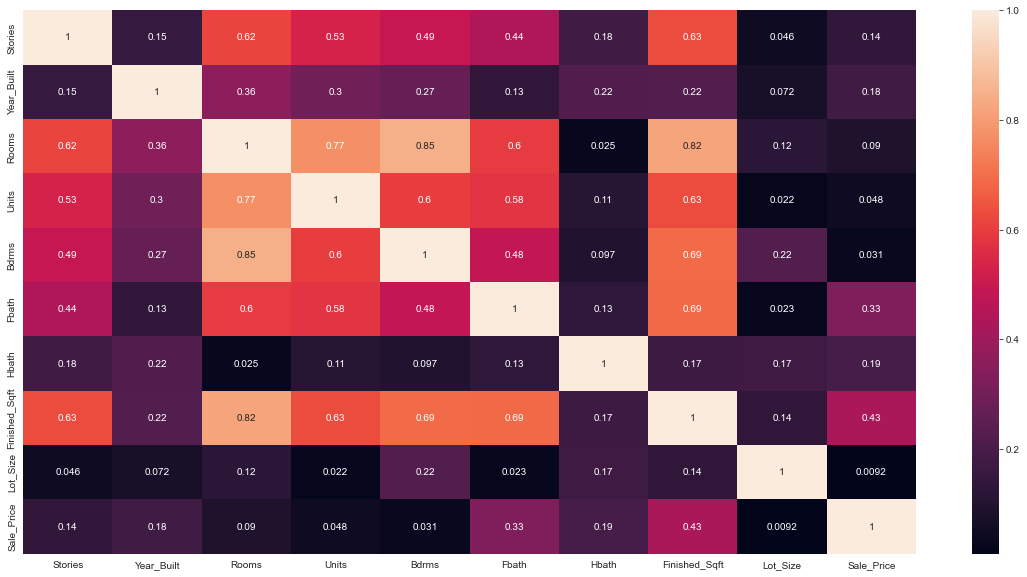

In [8]:
columns = ['Stories','Year_Built','Rooms','Units','Bdrms','Fbath','Hbath','Finished_Sqft','Lot_Size','Sale_Price']
plt.figure(figsize=(20, 10))
sns.heatmap(house[columns].corr().abs(),  annot=True)

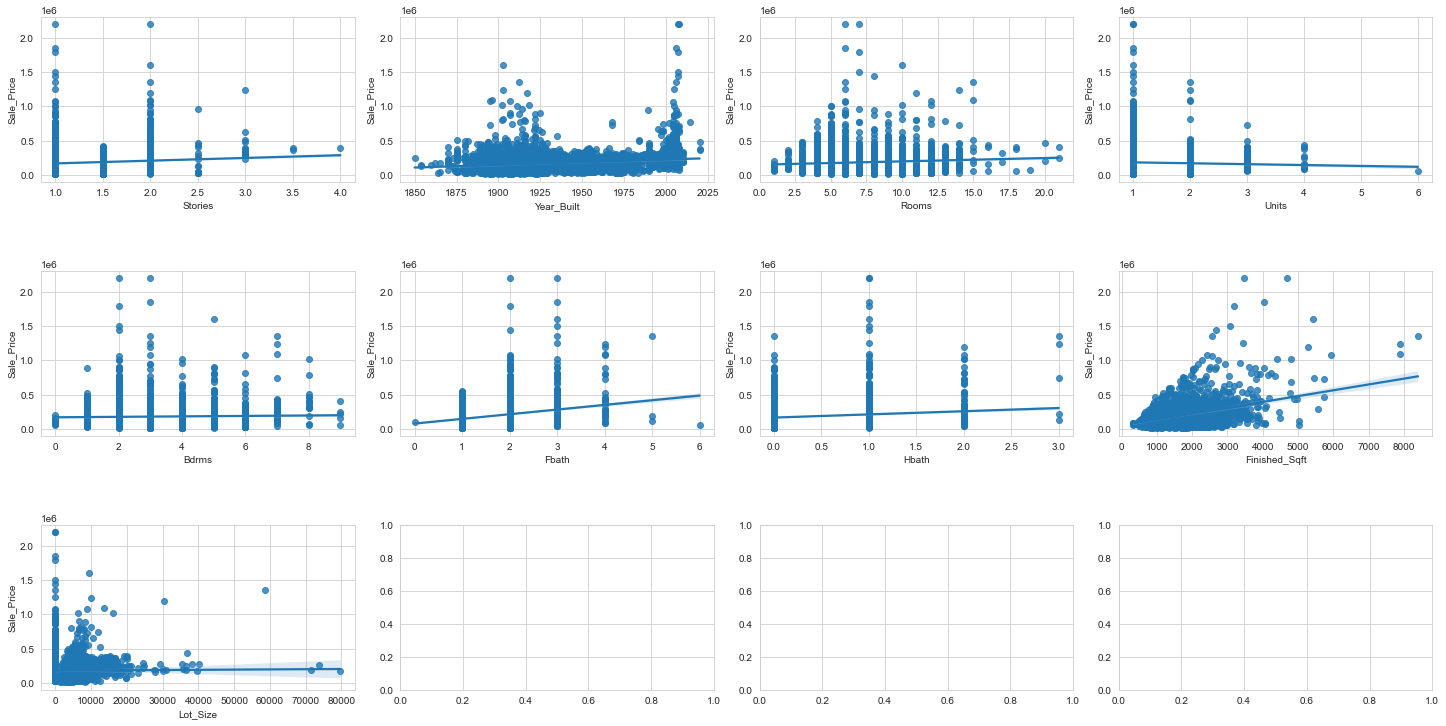

In [9]:
columns = ['Stories','Year_Built','Rooms','Units','Bdrms','Fbath','Hbath','Finished_Sqft','Lot_Size']
x = house.loc[:,columns]
y = house['Sale_Price']
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(columns):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Let's take a look as sale prices by District and Neighborhood

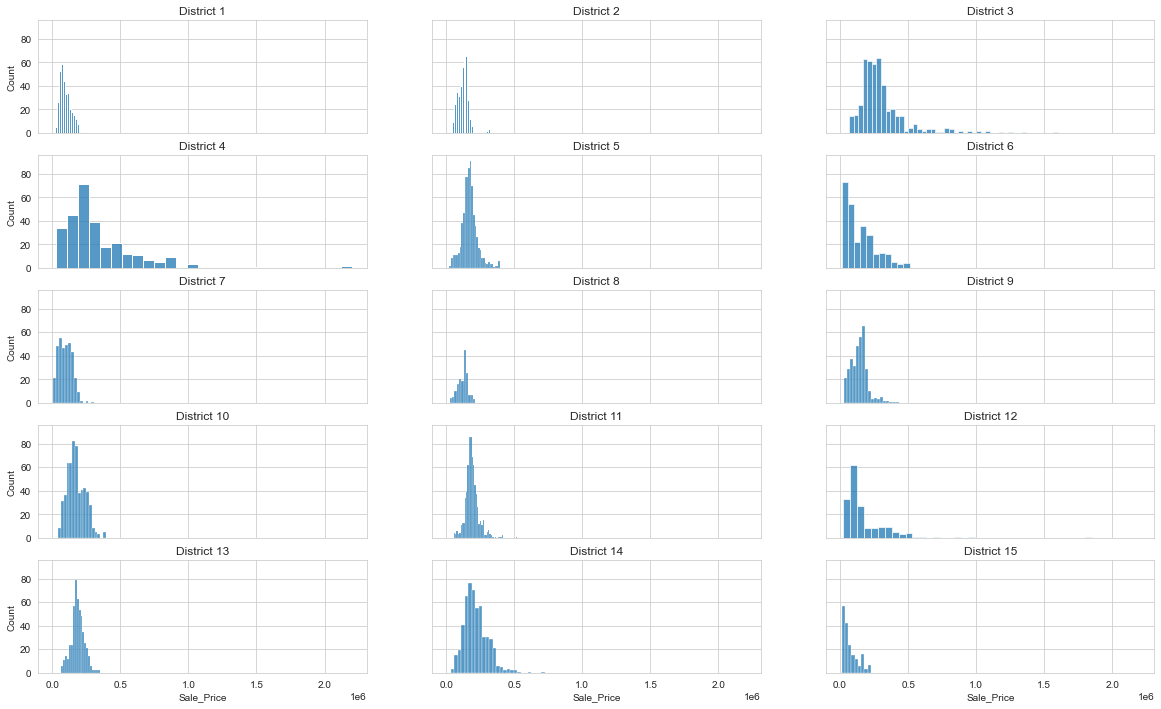

In [10]:
# distribution of Sale prices by district

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 12), sharex= True, sharey= True)
index = 0
axs = axs.flatten()

for i in range(1,16):
    sns.histplot(house.loc[house['District']==i,'Sale_Price'], ax=axs[index]).set_title('District {}'.format(i))
    index += 1

#plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=6.0)

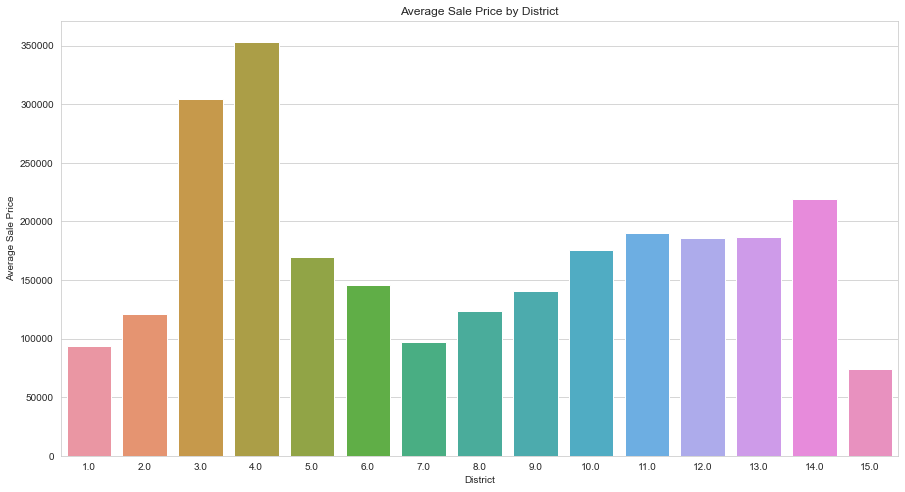

In [11]:
# Now let's look at average sale price

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x=house.groupby('District')['Sale_Price'].mean().index,y=house.groupby('District')['Sale_Price'].mean().values)
ax.set(ylabel="Average Sale Price", title= "Average Sale Price by District");



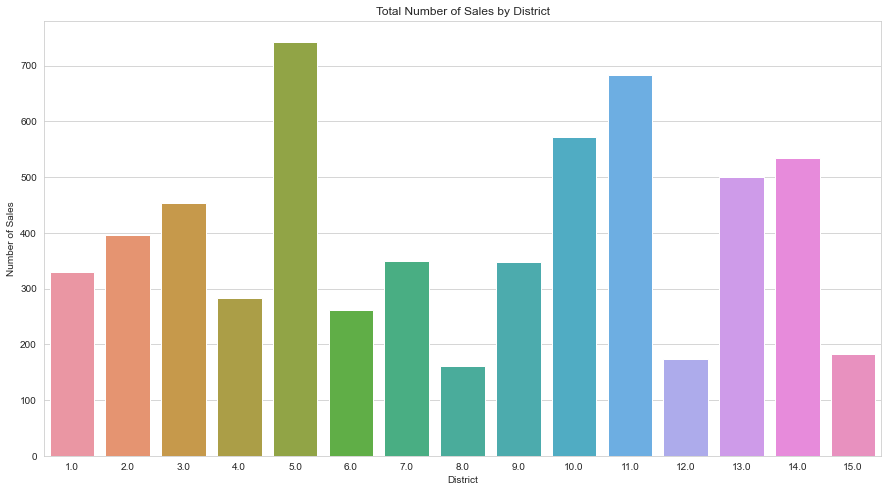

In [12]:
# number of sales by district

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x=house.groupby('District')['Sale_Price'].count().index,y=house.groupby('District')['Sale_Price'].count().values)
ax.set(ylabel="Number of Sales", title= "Total Number of Sales by District");


### What do sale prices look like for the different styles of property?

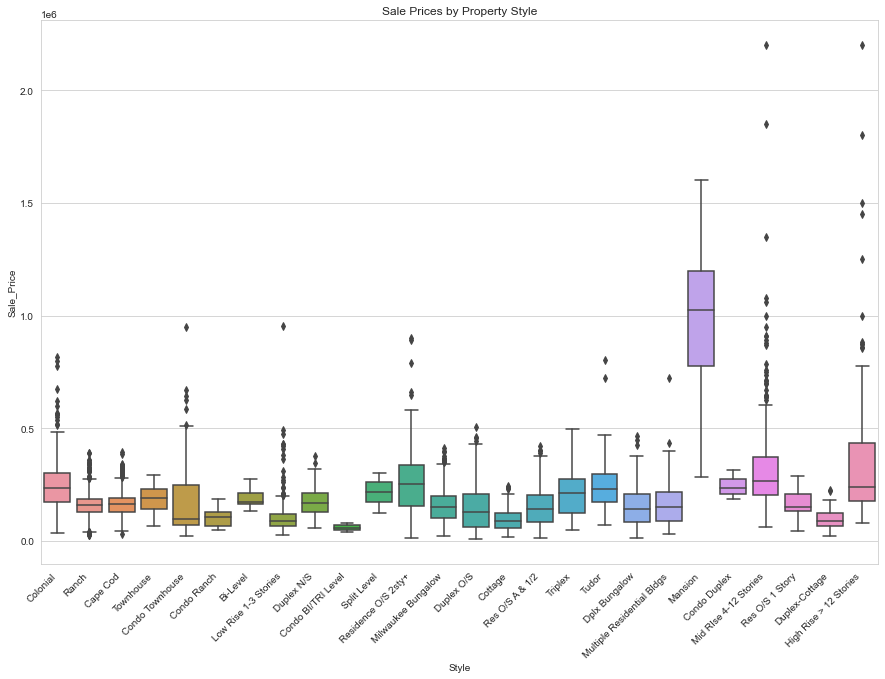

In [13]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(x="Style",y='Sale_Price', data = house, orient='v').set_title('Sale Prices by Property Style')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
plt.show()

### When are sales occuring?

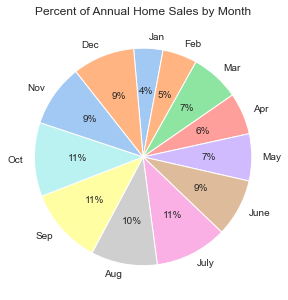

In [14]:
labels =['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
colors = sns.color_palette('pastel')[0:11]

fig,ax = plt.subplots(figsize=(5,5))
ax.pie(house.groupby(pd.Grouper(key='Date', axis=0, freq='M')).count()['PropertyID'], labels = labels, colors = colors, autopct='%.0f%%',counterclock=False,startangle=95)
ax.set_title("Percent of Annual Home Sales by Month")
plt.show()


### <u>References</u>
Milwaukee property sales data for [2020](https://data.milwaukee.gov/dataset/property-sales-data/resource/5ad3b44d-ba65-47eb-bd08-3f6cd07bf597)

Notebooks that inspired this project: <br>
[Melbourne Comprehensize Housing Market Analysis](https://www.kaggle.com/code/janiobachmann/melbourne-comprehensive-housing-market-analysis)

[EDA | Perth Housing Price Prediction](https://www.kaggle.com/code/shtrausslearning/eda-perth-housing-price-prediction#-2-%7C-EXPLORATORY-DATA-ANALYSIS)